# **22_Aug 2024(Types of RNN, BPTT (BackPropogation Through Time) and Problem with RNN)**

In [1]:
# Recurrent means Repeating

# Here each input is connected with each neuron and each neuron connected with each other neuron.that is called RNN. 

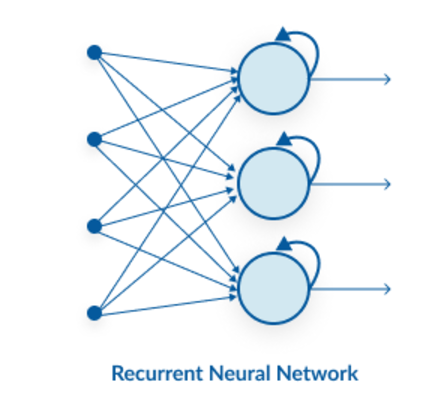

In [3]:
                ## TYPES OF RNN ARCHITECTURE :-
# (i) Many to one RNN - multiple input data and single output.

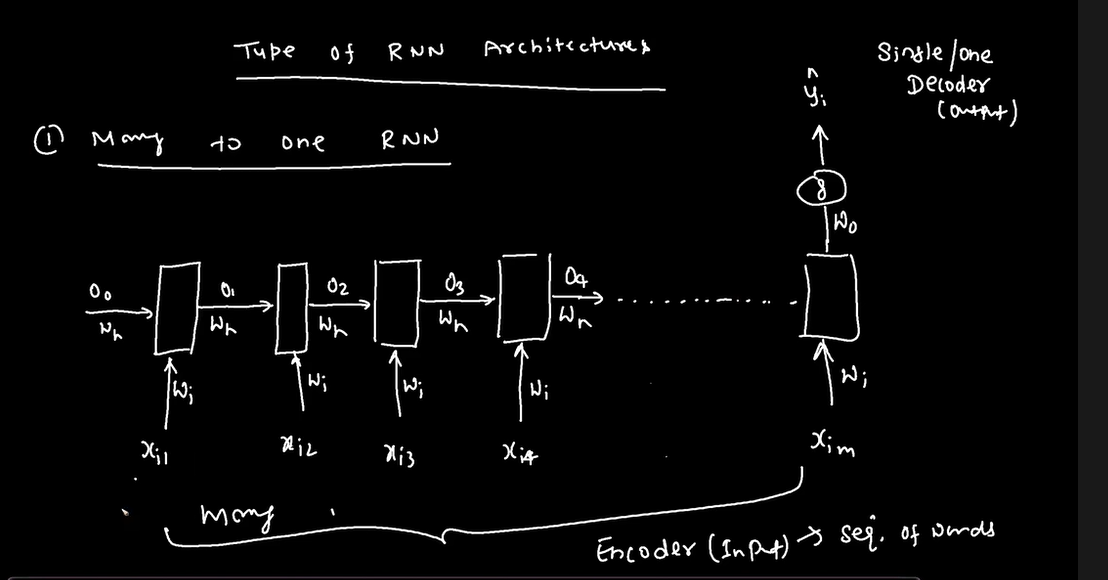

In [4]:
# many words(sequence of words) that is Encoder
# single/one output that is Decoder, output like +ve or -ve

In [5]:
# (ii) One to many RNN - input is one and output is many(sequence of words)

# like i am giving the single image, we will get output in many words or sentences 

In [7]:
# (iii) (a) Many to many RNN(with same length) - 

# like parts of speech tagging/name entity recognition

# (iii) (b) many to many RNN(with different length) - machine translation( like i will convert english to hindi them may be lenght will be different) 

In [ ]:
                    ### PROBLEM WITH RNN

# (i) Vanishing Gradient - vanishing gradient problem there  because of problem of long term dependency  
# (ii) Elploding Gradient - gradient value becomes very big and this often occurs when we initialize larger weights

# Solution of this problem is LSTM or GRU

# **28th AUG 2024**

**SimpleRNN_Embedding_Method.ipynb**

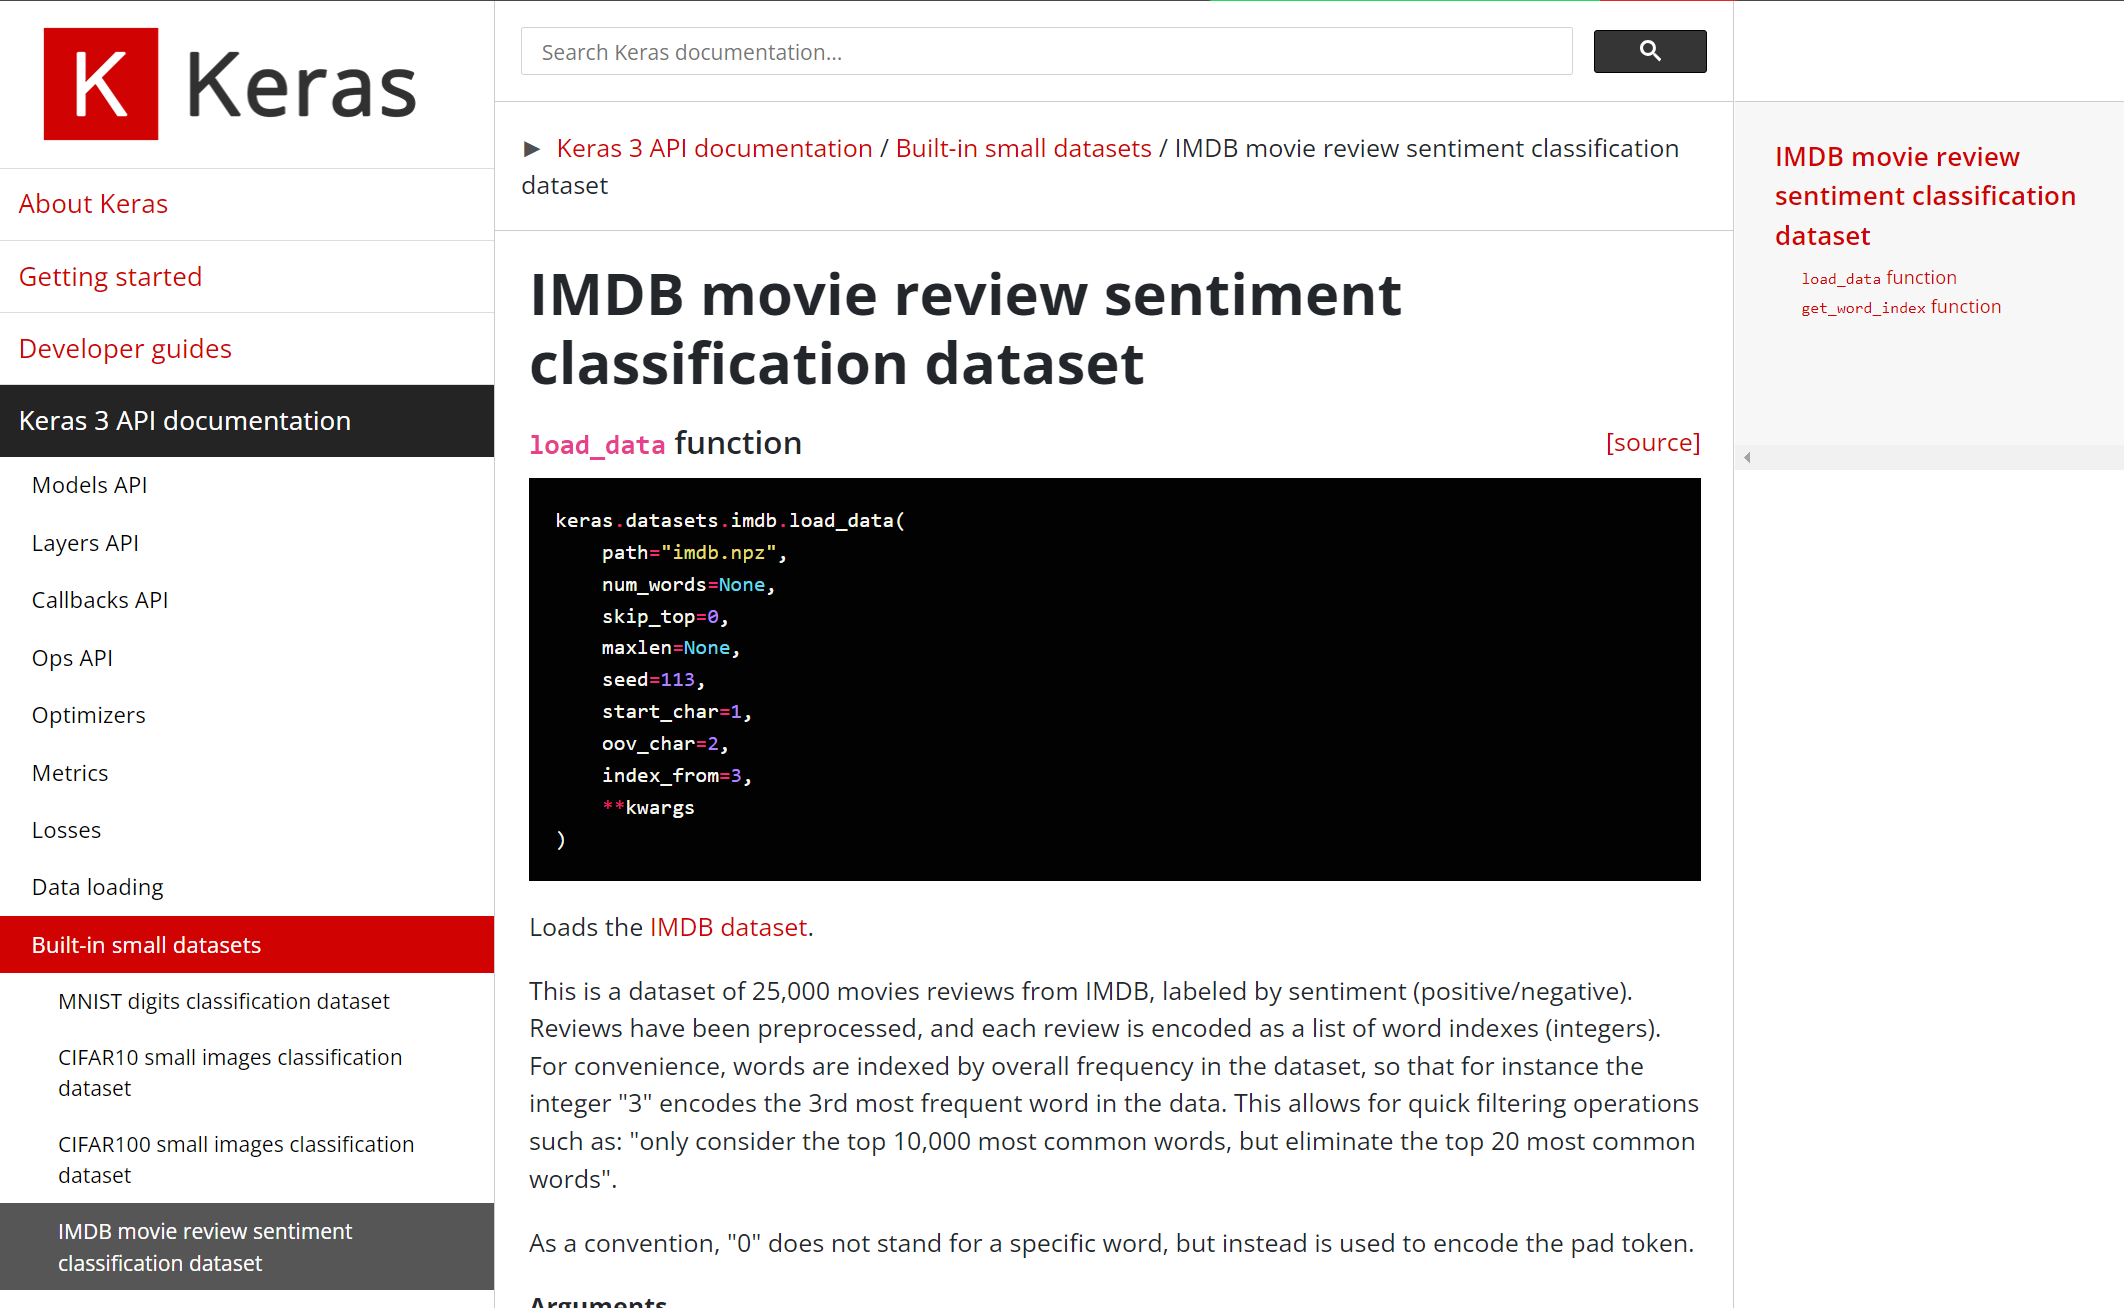

In [8]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

In [9]:
max_features = 10000
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=max_features)
print(f"Training data shape : {x_train.shape}, Training labels shape : {y_train.shape}")
print(f"Test data shape : {x_test.shape}, Test labels shape : {y_test.shape}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape : (25000,), Training labels shape : (25000,)
Test data shape : (25000,), Test labels shape : (25000,)


In [10]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [11]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [12]:
word_index = imdb.get_word_index()
word_index

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [15]:
reverse_word_index = {value : key for key,value in word_index.items()}
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [16]:
sample_review = x_train[100]
sample_label = y_train[100]

In [17]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sample_review])
decoded_review

"? i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of ? drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was ? on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep ? the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the ? box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10"

In [18]:
print(len(x_train[0]))
print(len(x_train[10]))
print(len(x_train[100]))
print(len(x_train[1000]))
print(len(x_train[10000]))

# here length is different, RNN will not work with different length

218
450
158
298
118


In [19]:
from tensorflow.keras.preprocessing import sequence
max_length = 500

x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

In [20]:
print(len(x_train[0]))
print(len(x_train[10]))
print(len(x_train[100]))
print(len(x_train[1000]))
print(len(x_train[10000]))

# here length is same, now RNN will work

500
500
500
500
500


In [21]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

**Building Embedding RNN method**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [23]:
model = Sequential()
model.add(Embedding(input_dim = max_features, output_dim = 128, input_length = max_length))
model.add(SimpleRNN(128, activation='relu'))
# Formula : units * (units + input_dim + 1)
# 128 * (128 + 128 + 1) = 128 * 128 + 128 * 128 + 128
model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None, max_length))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\anasagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ embedding (Embedding)    │ (None, 500, 128)  │ 1,280,000 │
├──────────────────────────┼───────────────────┼───────────┤
│ simple_rnn (SimpleRNN)   │ (None, 128)       │    32,896 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense (Dense)            │ (None, 1)         │       129 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 1,313,025 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
earlystopping

In [25]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2,
                    callbacks=[earlystopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 88ms/step - accuracy: 0.5865 - loss: 4689.0830 - val_accuracy: 0.5628 - val_loss: 0.8698
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.6169 - loss: 0.7383 - val_accuracy: 0.6494 - val_loss: 0.6177
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.7218 - loss: 3633524.7500 - val_accuracy: 0.5764 - val_loss: 0.6970
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 109ms/step - accuracy: 0.5875 - loss: 4109563.5000 - val_accuracy: 0.5772 - val_loss: 0.6955
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.6446 - loss: 0.6084 - val_accuracy: 0.6154 - val_loss: 0.6606
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 102ms/step - accuracy: 0.6967 - loss: 0.5610 - val_accuracy: 0.6256 - val_loss: 0.6523
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 105ms/step - accuracy: 0.7145 - loss: 0.5441 - val_accuracy: 0.6308 - val_loss: 0.6515


In [26]:
# save the model in hdf5 file
model.save('simple_rnn_imdb.h5')

In [28]:
from tensorflow.keras.models import load_model
model1 = load_model('simple_rnn_imdb.h5')
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ embedding (Embedding)    │ (None, 500, 128)  │ 1,280,000 │
├──────────────────────────┼───────────────────┼───────────┤
│ simple_rnn (SimpleRNN)   │ (None, 128)       │    32,896 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense (Dense)            │ (None, 1)         │       129 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 1,313,027 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [29]:
model1.get_weights()

[array([[ 4.6026939e-01,  5.3679711e-01, -4.7622940e-01, ...,
          1.6682579e-01, -5.7529271e-01,  3.3152324e-01],
        [-1.5312938e-02,  5.5725582e-02, -6.9295399e-02, ...,
         -2.4750771e-02,  1.7283227e-02,  2.1044627e-02],
        [ 3.2524448e-03,  1.1177997e-01, -9.9141851e-02, ...,
         -6.6145271e-02, -4.1530319e-02,  5.1062483e-02],
        ...,
        [-1.9983746e-02,  4.6692327e-02,  4.5455801e-03, ...,
         -2.3407977e-02,  4.3531593e-02, -2.1691920e-02],
        [-3.2966036e-02, -5.2847650e-02,  5.5632822e-02, ...,
         -5.0959524e-02,  8.3089374e-02, -2.5160950e-02],
        [ 2.7657495e-04, -1.8329728e-02, -5.7325665e-02, ...,
          6.7506908e-03, -3.4288663e-02, -3.2894351e-02]], dtype=float32),
 array([[-0.1402887 , -0.08601534, -0.01436404, ...,  0.09680431,
          0.01067039, -0.13282652],
        [ 0.05719287,  0.13264242, -0.01290468, ...,  0.16540767,
          0.07543565, -0.11601543],
        [-0.01204096,  0.00168013,  0.14584267

In [30]:
word_index = imdb.get_word_index()
reverse_word_index = {value : key for key, value in word_index.items()}

In [31]:
# Creating function
def decode_review(encoded_review):
  return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

def preprocess_text(text):
  words = text.lower().split()
  encoded_review = [word_index.get(word, 2) + 3 for word in words]
  padded_review = sequence.pad_sequences([encoded_review], maxlen=500)
  return padded_review

In [32]:
def predict_sentiment(review):
  preprocessed_input = preprocess_text(review)
  prediction = model1.predict(preprocessed_input)
  sentiment = 'Positive' if prediction[0][0]>0.5 else 'Negative'
  return sentiment, prediction[0][0]

In [33]:
# Check your model performance
sentence  = "This moview was simply amazing! The way actor acting was great and shows the talent"
sentiment, score = predict_sentiment(sentence)
print(sentence)
print(sentiment)
print(score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
This moview was simply amazing! The way actor acting was great and shows the talent
Positive
0.99907804
